In [1]:
import pandas as pd
from itertools import product, count

In [2]:
from matplotlib import pyplot as plt

In [3]:
import random

In [4]:
import networkx as nx

## Primo network: Rt=3

In [5]:
# Generatore di nodi - identificati con interi:
c = count()

edges = []
# Partiamo dall'individuo 0:
last = [next(c)]
nodes = [(last[0], 0, 1, 10)]


for gen in range(3):
    new = []
    for i in last:
        next_neigh = [next(c) for i in range(3)]
        new.extend(next_neigh)
        edges.extend([(i, n, 0) for n in next_neigh])
    nodes.extend([(n, gen+1, 0, 1) for idx, n in enumerate(new)])
    last = new

In [6]:
df_edges = pd.DataFrame(edges, columns=['i', 'j', 'color'])
df_nodes = pd.DataFrame(nodes, columns=['i', 'Generazione', 'sick', 'size'])

In [7]:
df_nodes['Vaccinato'] = ((pd.Series(range(2, len(df_nodes)+2)) % 3) != 0).astype(int)
df_nodes.loc[0, 'Vaccinato'] = 0

In [8]:
df_nodes.loc[[0, 1, 4, 13], 'sick'] = 1

In [9]:
df_edges.loc[[0, 3, 12], 'color'] = 1

In [10]:
df_edges.to_csv('data/rt_3_edges.csv', index=False)
df_nodes.to_csv('data/rt_3_nodes.csv', index=False)

#### Figura

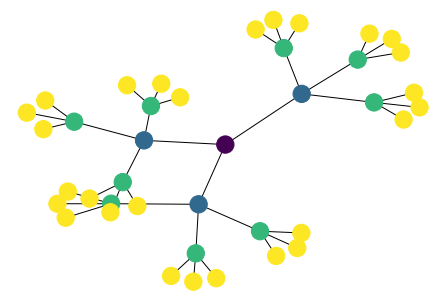

In [11]:
G = nx.Graph()
G.add_edges_from([e[:2] for e in edges])
nx.draw(G, node_color=[n[1] for n in nodes])

## Secondo network: Rt=2

In [12]:
# Generatore di nodi - identificati con interi:
c = count()

edges = []
# Partiamo dall'individuo 0:
last = [next(c)]
nodes = [(last[0], 0, 1, 10)]


for gen in range(4):
    new = []
    for i in last:
        next_neigh = [next(c) for i in range(2)]
        new.extend(next_neigh)
        edges.extend([(i, n, 0) for n in next_neigh])
    nodes.extend([(n, gen+1, 0, 1) for idx, n in enumerate(new)])
    last = new

In [13]:
df_edges = pd.DataFrame(edges, columns=['i', 'j', 'color'])
df_nodes = pd.DataFrame(nodes, columns=['i', 'Generazione', 'sick', 'size'])

In [14]:
df_nodes['Vaccinato'] = ((pd.Series(range(2, len(df_nodes)+2)) % 2) == 0).astype(int)
df_nodes.loc[0, 'Vaccinato'] = 0

In [15]:
df_nodes.loc[[0, 1, 3, 7, 15], 'sick'] = 1

In [16]:
df_edges.loc[[0, 2, 6, 14], 'color'] = 1

In [17]:
df_edges.to_csv('data/rt_2_edges.csv', index=False)
df_nodes.to_csv('data/rt_2_nodes.csv', index=False)

#### FIgura

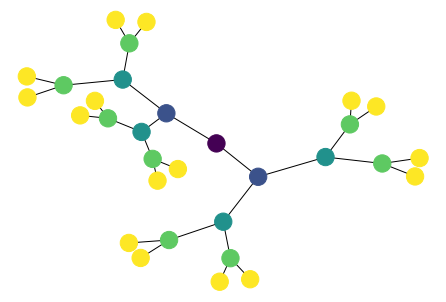

In [18]:
G = nx.Graph()
G.add_edges_from([e[:2] for e in edges])
nx.draw(G, node_color=[n[1] for n in nodes])